In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# PREPROCESSING

In [2]:
train = pd.read_excel("train.xlsx")
test = pd.read_excel("test.xlsx")
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [3]:
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     11094 non-null  object
 1   Location       11094 non-null  object
 2   Cuisines       11094 non-null  object
 3   Average_Cost   11094 non-null  object
 4   Minimum_Order  11094 non-null  object
 5   Rating         11094 non-null  object
 6   Votes          11094 non-null  object
 7   Reviews        11094 non-null  object
 8   Delivery_Time  11094 non-null  object
dtypes: object(9)
memory usage: 780.2+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     2774 non-null   object
 1   Location       2774 non-null   object
 2   Cuisines       2774 non-null   object
 3   Average_Cost   2774 non-null   object
 4   Minimum_Order  2774 non-null   object
 5   Rating         2774 non-null   object
 6   Votes          2774 non-null   object
 7   Reviews        2774 non-null   object
dtypes: object(8)
memory usage: 173.5+ KB


In [6]:
train.drop_duplicates(inplace = True)
train.reset_index(drop = True, inplace = True)
train["Average_Cost"] = train.Average_Cost.apply(lambda x : ''.join(x.split('₹')[1:]))
train['Average_Cost'] = train['Average_Cost'].str.replace(',', '')
train['Average_Cost'] = pd.to_numeric(train['Average_Cost'])

test["Average_Cost"] = test.Average_Cost.apply(lambda x : ''.join(x.split('₹')[1:]))
test['Average_Cost'] = test['Average_Cost'].str.replace(',', '')
test['Average_Cost'] = pd.to_numeric(test['Average_Cost'])

In [7]:
train["Minimum_Order"] = train.Minimum_Order.apply(lambda x : ''.join(x.split('₹')[1:]))
train['Minimum_Order'] = pd.to_numeric(train['Minimum_Order'])

test["Minimum_Order"] = test.Minimum_Order.apply(lambda x : ''.join(x.split('₹')[1:]))
test['Minimum_Order'] = pd.to_numeric(test['Minimum_Order'])

In [8]:
train['Rating'] = pd.to_numeric(train['Rating'], errors = 'coerce')
train['Rating'] = train['Rating'].fillna(0)
train['Votes'] = pd.to_numeric(train['Votes'], errors = 'coerce')
train['Votes'] = train['Votes'].fillna(0)
train['Reviews'] = pd.to_numeric(train['Reviews'], errors = 'coerce')
train['Reviews'] = train['Reviews'].fillna(0)

test['Rating'] = pd.to_numeric(test['Rating'], errors = 'coerce')
test['Rating'] = test['Rating'].fillna(0)
test['Votes'] = pd.to_numeric(test['Votes'], errors = 'coerce')
test['Votes'] = test['Votes'].fillna(0)
test['Reviews'] = pd.to_numeric(test['Reviews'], errors = 'coerce')
test['Reviews'] = test['Reviews'].fillna(0)

In [9]:
train['Average_Cost'] = train['Average_Cost'].fillna(train['Average_Cost'].mean())
train['Minimum_To_Cost_Ratio'] = train['Minimum_Order']/train['Average_Cost']
train['Branches'] = train['Restaurant'].map(train['Restaurant'].value_counts())
train['Restaurants_In_City'] = train['Location'].map(train['Location'].value_counts())

test['Average_Cost'] = test['Average_Cost'].fillna(test['Average_Cost'].mean())
test['Minimum_To_Cost_Ratio'] = test['Minimum_Order']/test['Average_Cost']
test['Branches'] = test['Restaurant'].map(test['Restaurant'].value_counts())
test['Restaurants_In_City'] = test['Location'].map(test['Location'].value_counts())

In [10]:
def extract_city(df):
    city = []
    for location in df.Location:
        if "Pune" in location:
            city.append("Pune")
        elif "Hyderabad" in location:
            city.append("Hyderabad")
        elif "Noida" in location:
            city.append("Noida")
        elif "Kolkata" in location:
            city.append("Kolkata")
        elif "Delhi" in location:
            city.append("Delhi")
        elif "Mumbai" in location:
            city.append("Mumbai")
        elif "Gurgaon" in location or "Gurgoan" in location:
            city.append("Gurgaon")
        else:
            city.append("Bangalore")
    
    return city

In [11]:
train['City'] = extract_city(train)
test['City'] = extract_city(test)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant             11094 non-null  object 
 1   Location               11094 non-null  object 
 2   Cuisines               11094 non-null  object 
 3   Average_Cost           11094 non-null  float64
 4   Minimum_Order          11094 non-null  int64  
 5   Rating                 11094 non-null  float64
 6   Votes                  11094 non-null  float64
 7   Reviews                11094 non-null  float64
 8   Delivery_Time          11094 non-null  object 
 9   Minimum_To_Cost_Ratio  11094 non-null  float64
 10  Branches               11094 non-null  int64  
 11  Restaurants_In_City    11094 non-null  int64  
 12  City                   11094 non-null  object 
dtypes: float64(5), int64(3), object(5)
memory usage: 1.1+ MB


In [13]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Minimum_To_Cost_Ratio,Branches,Restaurants_In_City,City
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,50,3.5,12.0,4.0,30 minutes,0.250000,1,584,Pune
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,50,3.5,11.0,4.0,30 minutes,0.500000,5,366,Bangalore
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150.0,50,3.6,99.0,30.0,65 minutes,0.333333,2,459,Mumbai
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,99,3.7,176.0,95.0,30 minutes,0.396000,2,791,Noida
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,99,3.2,521.0,235.0,65 minutes,0.495000,1,457,Bangalore


In [14]:
train.nunique()

Restaurant               7480
Location                   35
Cuisines                 2179
Average_Cost               26
Minimum_Order              18
Rating                     30
Votes                    1103
Reviews                   761
Delivery_Time               7
Minimum_To_Cost_Ratio      67
Branches                   21
Restaurants_In_City        34
City                        8
dtype: int64

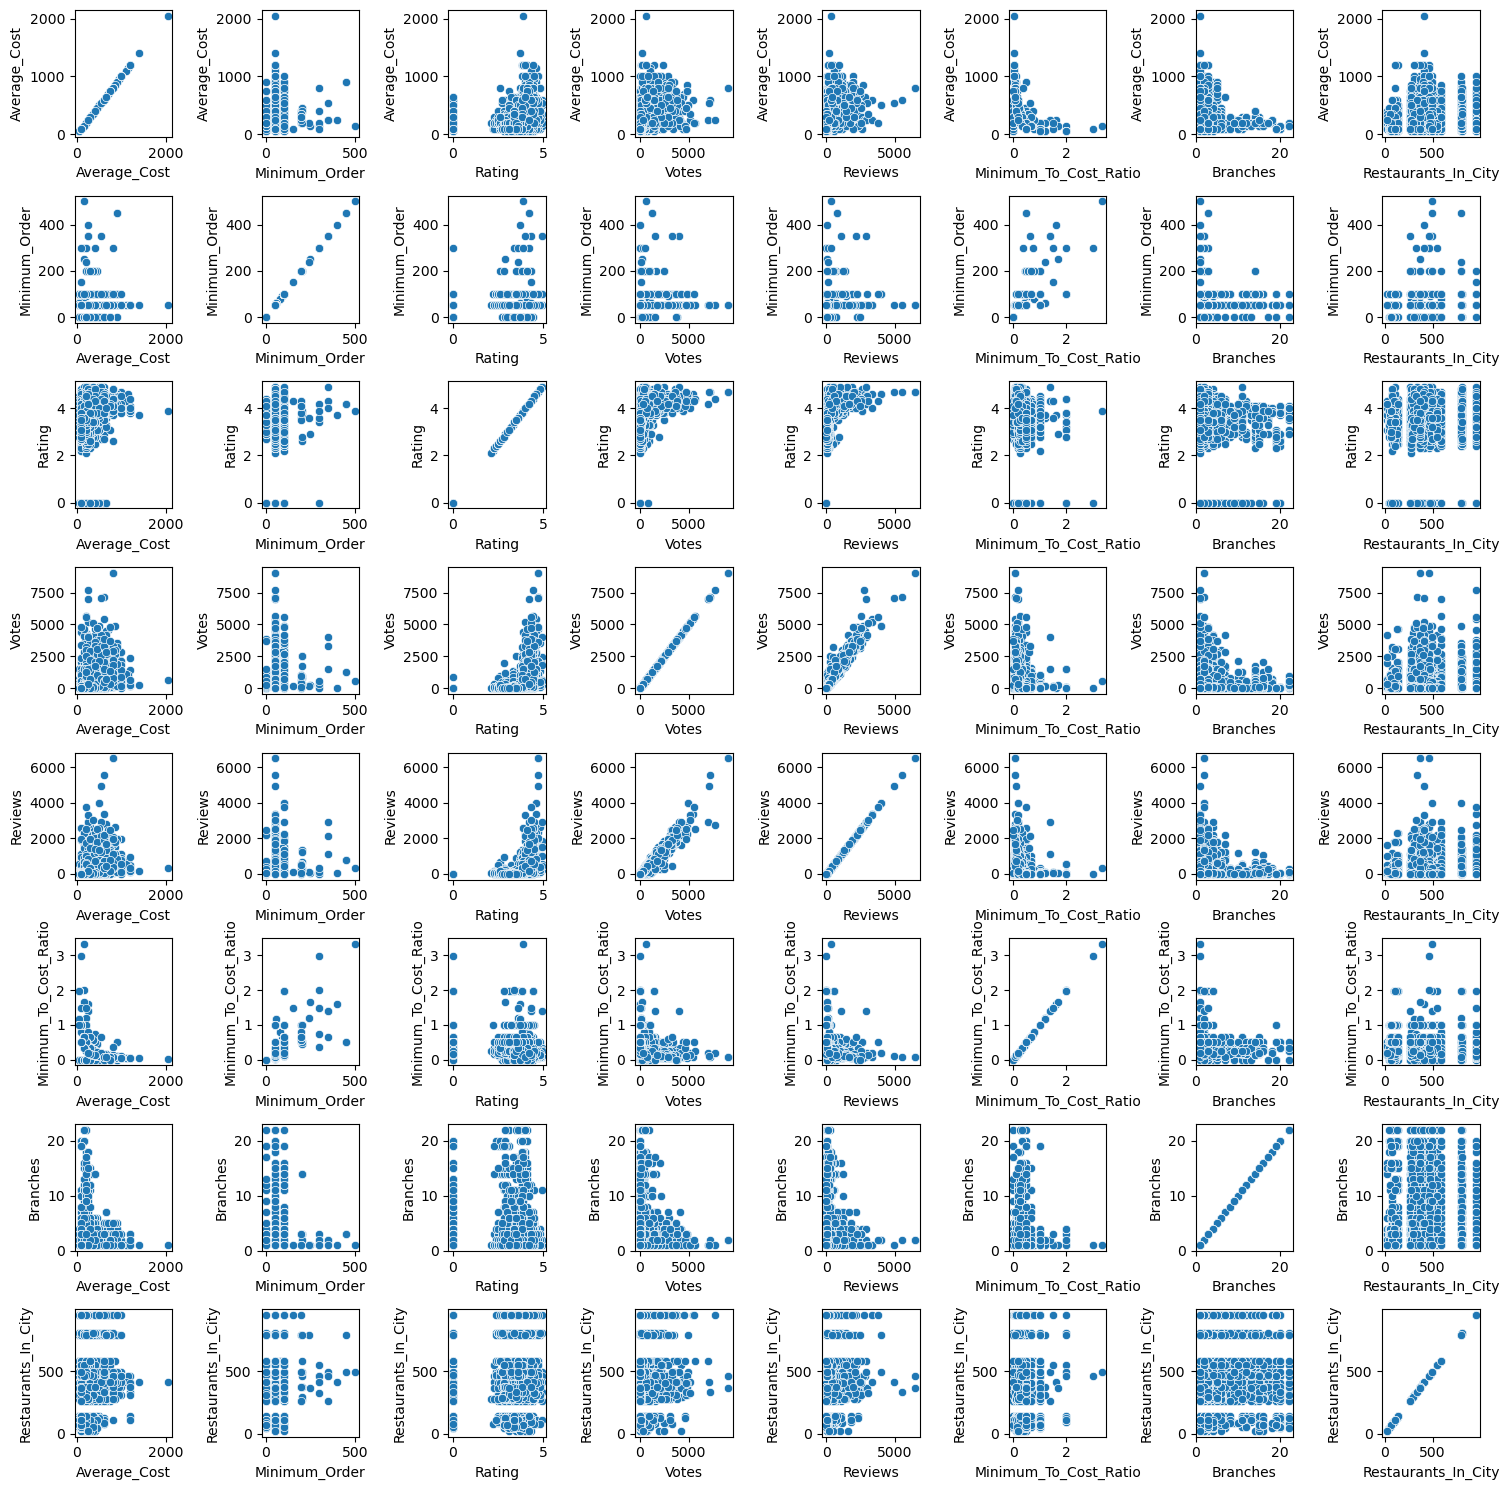

In [15]:
numericals = train[['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews', 'Minimum_To_Cost_Ratio', 'Branches', 'Restaurants_In_City']]
fig, axes = plt.subplots(8, 8, figsize = (15, 15))
axes = axes.flatten()
k = 0
j = 0
for i, ax in enumerate(axes):
    x = numericals.iloc[:, k]
    y = numericals.iloc[:, j]
    sns.scatterplot(x = x, y = y, ax = ax)
    k = k + 1
    if k == 8:
        k = 0
        j = j + 1
plt.tight_layout()
plt.show()

<AxesSubplot:>

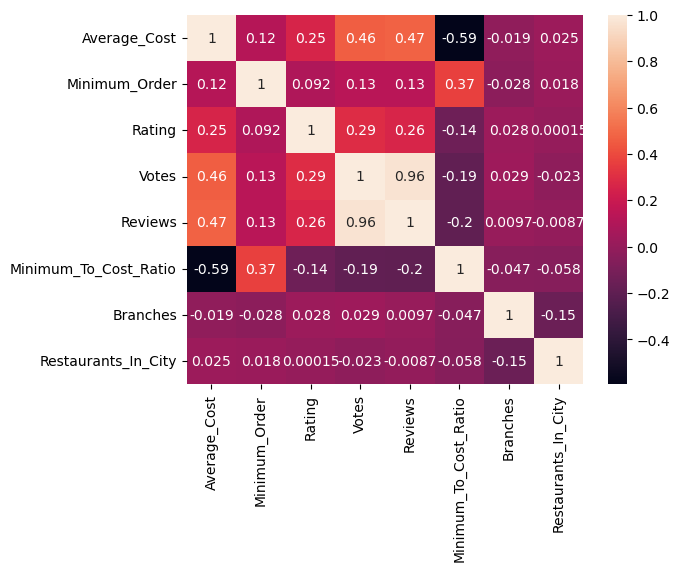

In [16]:
corr = train.corr()
sns.heatmap(corr, annot = True)

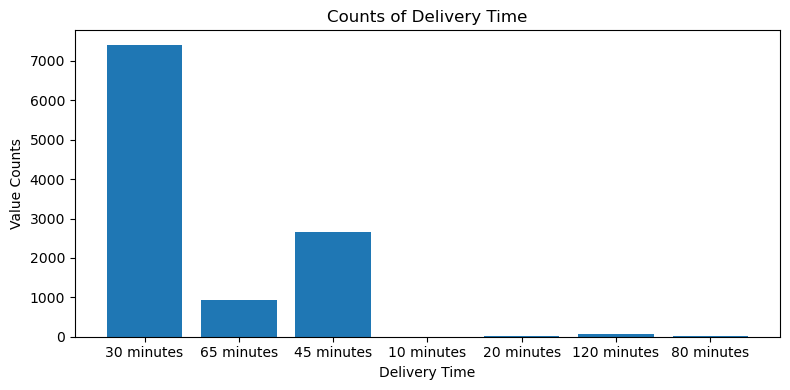

In [17]:
from collections import Counter

category_counts = Counter(train['Delivery_Time'])
x = list(category_counts.keys())
y = list(category_counts.values())

plt.figure(figsize = (8, 4))
plt.bar(x, y)
plt.xlabel('Delivery Time')
plt.ylabel('Value Counts')
plt.title('Counts of Delivery Time')
plt.tight_layout()
plt.show()

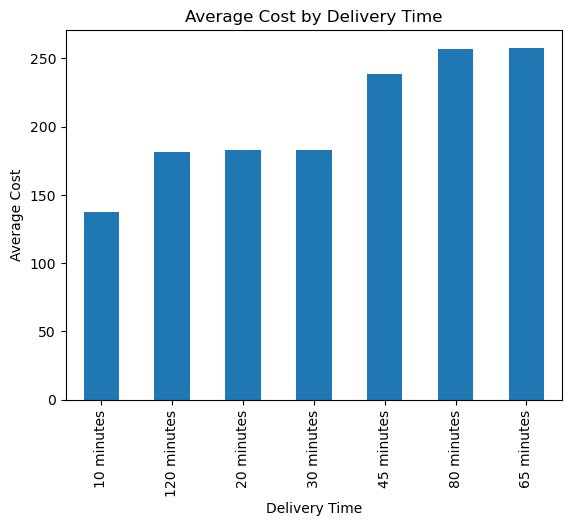

In [18]:
cost_time_agg = train.groupby('Delivery_Time')['Average_Cost'].mean().sort_values(ascending=True)
cost_time_agg.plot(kind = 'bar')
plt.xlabel('Delivery Time')
plt.ylabel('Average Cost')
plt.title('Average Cost by Delivery Time')
plt.show()

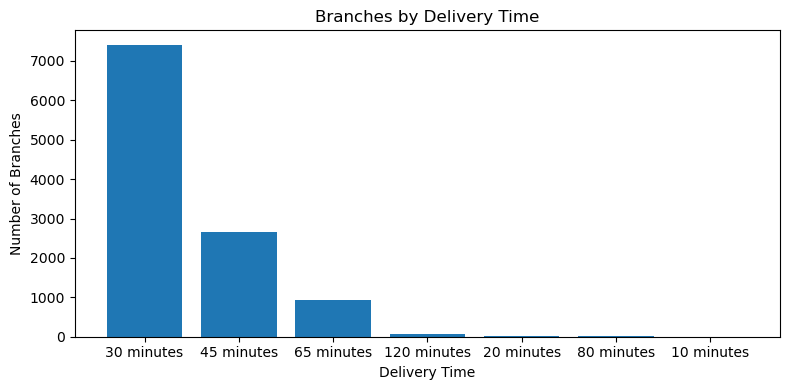

In [19]:
plt.figure(figsize = (8, 4))
grouped_data = train.groupby("Delivery_Time")["Branches"].count().sort_values(ascending=False)
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Delivery Time')
plt.ylabel('Number of Branches')
plt.title('Branches by Delivery Time')
plt.tight_layout()
plt.show()

## WINSORIZING OUTLIERS

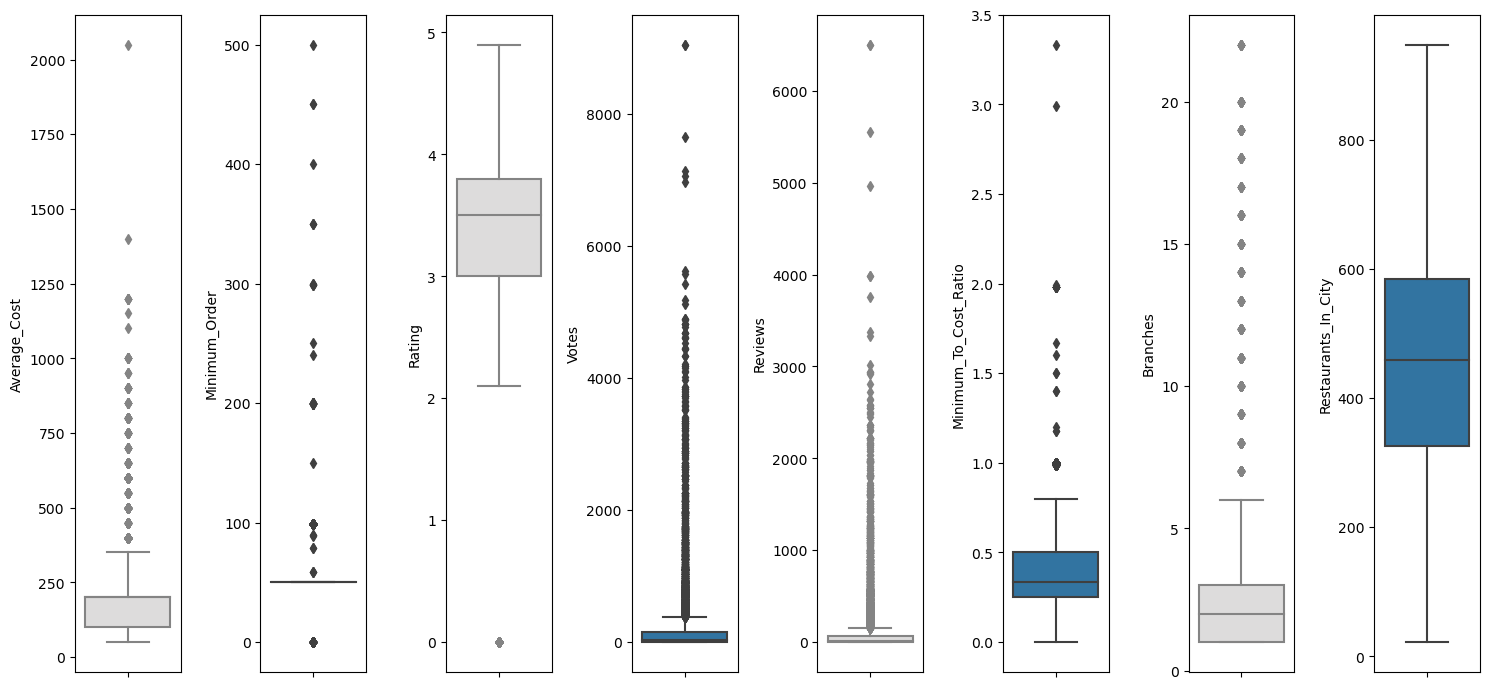

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 7)
f,(ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(1, 8)
sns.boxplot(y = 'Average_Cost', data = train, ax = ax1, palette = 'coolwarm')
sns.boxplot(y = 'Minimum_Order', data = train, ax = ax2)
sns.boxplot(y = 'Rating', data = train, ax = ax3, palette = 'coolwarm')
sns.boxplot(y = 'Votes', data = train, ax = ax4)
sns.boxplot(y = 'Reviews', data = train, ax = ax5, palette = 'coolwarm')
sns.boxplot(y = 'Minimum_To_Cost_Ratio', data = train, ax = ax6)
sns.boxplot(y = 'Branches', data = train, ax = ax7, palette = 'coolwarm')
sns.boxplot(y = 'Restaurants_In_City', data = train, ax = ax8)
f.tight_layout()

In [21]:
for column in ['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews', 'Minimum_To_Cost_Ratio', 'Branches']:
    IQR = train[column].quantile(0.75) - train[column].quantile(0.25)
    Lower_fence = train[column].quantile(0.25) - (IQR * 1.5)
    Upper_fence = train[column].quantile(0.75) + (IQR * 1.5)
    print(f'{column} outliers are values < {round(Lower_fence,2)} or > {round(Upper_fence,2)}')

Average_Cost outliers are values < -50.0 or > 350.0
Minimum_Order outliers are values < 50.0 or > 50.0
Rating outliers are values < 1.8 or > 5.0
Votes outliers are values < -218.0 or > 382.0
Reviews outliers are values < -89.5 or > 154.5
Minimum_To_Cost_Ratio outliers are values < -0.12 or > 0.88
Branches outliers are values < -2.0 or > 6.0


In [22]:
train_copy = train.copy()

train_copy['Average_Cost'] = np.where(train_copy['Average_Cost'] > 350.0, 350.0, train_copy['Average_Cost'])
train_copy['Minimum_Order'] = np.where(train_copy['Minimum_Order'] < 50.0, 50.0, train_copy['Minimum_Order'])
train_copy['Minimum_Order'] = np.where(train_copy['Minimum_Order'] > 50.0, 50.0, train_copy['Minimum_Order'])
train_copy['Rating'] = np.where(train_copy['Rating'] < 1.8, 1.8, train_copy['Rating'])
train_copy['Votes'] = np.where(train_copy['Votes'] > 382.0, 382.0, train_copy['Votes'])
train_copy['Reviews'] = np.where(train_copy['Reviews'] > 154.5, 154.5, train_copy['Reviews'])
train_copy['Minimum_To_Cost_Ratio'] = np.where(train_copy['Minimum_To_Cost_Ratio'] > 0.88, 0.88, train_copy['Minimum_To_Cost_Ratio'])
train_copy['Branches'] = np.where(train_copy['Branches'] > 6.0, 6.0, train_copy['Branches'])

## DUMMIFICATION

In [23]:
X1 = pd.get_dummies(train['City'], drop_first = True)

X2 = pd.get_dummies(test['City'], drop_first = True)
X2 = pd.concat([test[['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews', 'Branches', 'Minimum_To_Cost_Ratio', 'Restaurants_In_City']], X2], axis = 1)

## DECISION TREE CLASSIFIER

In [24]:
X = pd.concat([train_copy[['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews', 'Branches', 'Minimum_To_Cost_Ratio', 'Restaurants_In_City']], X1], axis = 1)

from sklearn.tree import DecisionTreeClassifier

X_train, X_val, y_train, y_val = train_test_split(X, train_copy['Delivery_Time'], test_size = 0.1, random_state = 5)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_val, y_pred_val))

Train Accuracy: 0.9872796474358975
Test Accuracy: 0.7432432432432432


## RANDOM FOREST CLASSIFIER

In [25]:
X = pd.concat([train[['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews', 'Branches', 'Minimum_To_Cost_Ratio', 'Restaurants_In_City']], X1], axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X, train['Delivery_Time'], test_size = 0.3, random_state = 5)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 5)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_val, y_pred_val))

Train Accuracy: 0.9922730199613651
Test Accuracy: 0.7750075097626915


## RFECV

In [26]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator = model, step = 1, cv = 5, scoring = 'accuracy')
rfecv = rfecv.fit(X_train, y_train)

print("The optimal number of features:", rfecv.n_features_)
print("Best features:", X_train.columns[rfecv.support_])

C:\Users\jadha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


The optimal number of features: 13
Best features: Index(['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews',
       'Branches', 'Minimum_To_Cost_Ratio', 'Restaurants_In_City', 'Delhi',
       'Gurgaon', 'Mumbai', 'Noida', 'Pune'],
      dtype='object')


In [27]:
X_train_selected = rfecv.transform(X_train)
X_val_selected = rfecv.transform(X_val)

model = RandomForestClassifier()
model.fit(X_train_selected, y_train)
y_pred_train = model.predict(X_train_selected)
y_pred_val = model.predict(X_val_selected)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_val, y_pred_val))

Train Accuracy: 0.9922730199613651
Test Accuracy: 0.7723039951937519


## OPTUNA

In [28]:
import optuna

def objective(trial):
    param_space = {
        'n_estimators': trial.suggest_int('n_estimators', 40, 300, step=20),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 10, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 3, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None])
    }
    
    model = RandomForestClassifier(**param_space)
    model.fit(X_train_selected, y_train)
    y_pred_val = model.predict(X_val_selected)
    return accuracy_score(y_val, y_pred_val)

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 20, show_progress_bar = True)

[I 2023-07-06 14:58:34,010] A new study created in memory with name: no-name-4bf30259-df27-458a-81b9-8fb968c40c20


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-07-06 14:58:34,722] Trial 0 finished with value: 0.37909282066686695 and parameters: {'n_estimators': 180, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': True, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.37909282066686695.
[I 2023-07-06 14:58:35,055] Trial 1 finished with value: 0.2841694202463202 and parameters: {'n_estimators': 80, 'max_depth': 3, 'min_samples_split': 19, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': False, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.37909282066686695.
[I 2023-07-06 14:58:37,352] Trial 2 finished with value: 0.5701411835386002 and parameters: {'n_estimators': 300, 'max_depth': 7, 'min_samples_split': 16, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': False, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.5701411835386002.
[I 2023-07-06 14:58:39,068] Tr

In [29]:
# rfr_params = {'n_estimators': 100,
#               'max_depth': 21,
#               'min_samples_split': 3,
#               'min_samples_leaf': 1,
#               'max_features': 'sqrt',
#               'criterion': 'entropy',
#               'bootstrap': True,
#               'class_weight': None
#              }

model = RandomForestClassifier(**study.best_trial.params)
model.fit(X_train_selected, y_train)
y_pred_train = model.predict(X_train_selected)
y_pred_val = model.predict(X_val_selected)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_val, y_pred_val))

Train Accuracy: 0.8598840952994204
Test Accuracy: 0.7410633823971162


# SUBMISSION

In [30]:
X2_selected = rfecv.transform(X2)
test['Delivery_Time'] = model.predict(X2_selected)
test['Delivery_Time'].to_excel('submission.xlsx', index = False)

In [31]:
# MACHINEHACK SCORE - 0.79813
# RANK - 104
# RANK 1 SCORE - 0.84823